In [1]:
#!pip install graphviz

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import networkx as nx
import colorsys

# Data Processing

In [3]:
loan = pd.read_csv("Loan_Data.csv")
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
loan.isnull().sum()
#loan['Education'] = loan.Education.map({'Not Graduate':0, 'Graduate':1})
#loan.Education.head(10)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan['Gender'] = loan.Gender.map({'Female':0, 'Male':1})
loan['Married'] = loan.Married.map({'No':0, 'Yes':1})
loan['Education'] = loan.Education.map({'Not Graduate':0, 'Graduate':1})
loan['Self_Employed'] = loan.Self_Employed.map({'No':0, 'Yes':1})
loan['Loan_Status'] = loan.Loan_Status.map({'N':0, 'Y':1})
loan['Dependents'] = loan.Dependents.map({'0':0, '1':1, '2':2, '3+':3})


In [63]:
loan.Married.fillna(0, inplace=True)
loan.Gender.fillna(1, inplace=True)
loan.Self_Employed.fillna(0, inplace=True)
loan.Dependents.fillna(0, inplace=True)
loan.LoanAmount.fillna(0, inplace=True)
loan.Loan_Amount_Term.fillna(0, inplace=True)
loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,1.0,1.0,0.0,0,0.0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,1.0,1.0,2.0,1,0.0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,1.0,1.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [127]:
feature_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'Dependents', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# define X and y
X = loan[feature_cols]
y = loan.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Decision Trees

In [128]:
# fit a classification tree with max_depth=3 on all data
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [129]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Gender,0.000000
1,Married,0.232926
2,Education,0.183257
3,Self_Employed,0.000000
4,ApplicantIncome,0.137022
5,Dependents,0.000000
6,CoapplicantIncome,0.206814
7,LoanAmount,0.239981
8,Loan_Amount_Term,0.000000


In [130]:
clf1_pred = treeclf.predict(X_test)
print(f1_score(y_test, clf1_pred))

0.7755102040816326


In [131]:
# fit a classification tree with max_depth=6 on all data
treeclf2 = DecisionTreeClassifier(max_depth=6, random_state=1)
treeclf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [132]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf2.feature_importances_})

,feature,importance
0,Gender,0.000000
1,Married,0.080500
2,Education,0.044965
3,Self_Employed,0.096404
4,ApplicantIncome,0.275936
5,Dependents,0.060364
6,CoapplicantIncome,0.123647
7,LoanAmount,0.285898
8,Loan_Amount_Term,0.032286


In [133]:
clf2_pred = treeclf2.predict(X_test)
print(f1_score(y_test, clf2_pred))

0.7837837837837838


In [134]:
r = export_text(treeclf, feature_names=feature_cols)
>>> print(r)

#graph = Source(export_graphviz(treeclf, out_file=None,
                                    #feature_names=feature_cols,
                                    #class_names=['0', '1'], filled = True))
#display(SVG(graph.pipe(format='svg')))

#with open("loan.dot", 'wb') as f:
  #  f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

|--- CoapplicantIncome <= 9974.00
|   |--- Education <= 0.50
|   |   |--- LoanAmount <= 132.50
|   |   |   |--- class: 1
|   |   |--- LoanAmount >  132.50
|   |   |   |--- class: 0
|   |--- Education >  0.50
|   |   |--- Married <= 0.50
|   |   |   |--- class: 1
|   |   |--- Married >  0.50
|   |   |   |--- class: 1
|--- CoapplicantIncome >  9974.00
|   |--- ApplicantIncome <= 2168.00
|   |   |--- class: 0
|   |--- ApplicantIncome >  2168.00
|   |   |--- ApplicantIncome <= 7670.50
|   |   |   |--- class: 1
|   |   |--- ApplicantIncome >  7670.50
|   |   |   |--- class: 0



In [135]:
r = export_text(treeclf2, feature_names=feature_cols)
>>> print(r)

|--- CoapplicantIncome <= 9974.00
|   |--- Education <= 0.50
|   |   |--- LoanAmount <= 132.50
|   |   |   |--- LoanAmount <= 93.50
|   |   |   |   |--- Loan_Amount_Term <= 240.00
|   |   |   |   |   |--- Married <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Married >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Loan_Amount_Term >  240.00
|   |   |   |   |   |--- ApplicantIncome <= 1894.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ApplicantIncome >  1894.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- LoanAmount >  93.50
|   |   |   |   |--- ApplicantIncome <= 2267.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ApplicantIncome >  2267.00
|   |   |   |   |   |--- ApplicantIncome <= 2321.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- ApplicantIncome >  2321.00
|   |   |   |   |   |   |--- class: 1
|   |   |--- LoanAmount >  132.50
|   |   |   |--- ApplicantIncome <= 6495.50
|   |   |

# Neural Networks

### Train models and predict

In [168]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp1_scores = []
mlp2_scores = []
mlp3_scores = []

for i in range(10):
    mlp1 = MLPClassifier(hidden_layer_sizes=(9, 6, 3), max_iter=5000)
    mlp1.fit(X_train, y_train)
    mlp1_pred = mlp1.predict(X_test)
    mlp1_scores.append(f1_score(y_test, mlp1_pred))

    mlp2 = MLPClassifier(hidden_layer_sizes=(9, 6), max_iter=5000)
    mlp2.fit(X_train, y_train)
    mlp2_pred = mlp2.predict(X_test)
    mlp2_scores.append(f1_score(y_test, mlp2_pred))

    mlp3 = MLPClassifier(hidden_layer_sizes=(9), max_iter=1000)
    mlp3.fit(X_train, y_train)
    mlp3_pred = mlp3.predict(X_test)
    mlp3_scores.append(f1_score(y_test, mlp3_pred))

print('Hidden layers of (9, 6, 3) led to a mean f1 score over 10 fittings and predictions of ', np.array(mlp1_scores).mean())
print('Hidden layers of (9, 9) led to a mean f1 score over 10 fittings and predictions of ', np.array(mlp2_scores).mean())
print('Hidden layers of (9) led to a mean f1 score over 10 fittings and predictions of ', np.array(mlp3_scores).mean())

Hidden layers of (9, 6, 3) led to a mean f1 score over 10 fittings and predictions of  0.7886683738796415
Hidden layers of (9, 9) led to a mean f1 score over 10 fittings and predictions of  0.7940104134532326
Hidden layers of (9) led to a mean f1 score over 10 fittings and predictions of  0.7983821557560696


### Visualize models

First model with hidden layers (9, 9, 9):


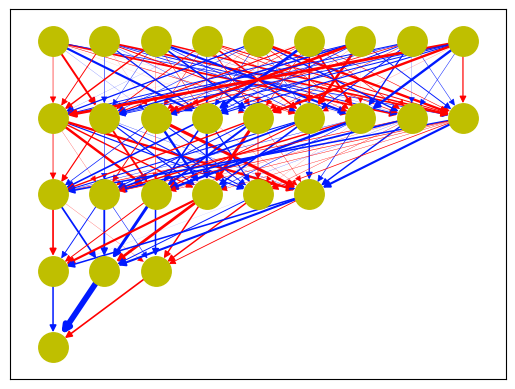

In [161]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw_networkx(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors, with_labels=False)
    
print('First model with hidden layers (9, 9, 9):')
show_ann(mlp1)

Second model with hidden layers (9, 9):


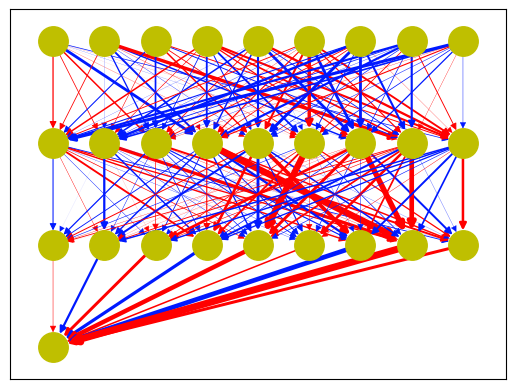

In [162]:
print('Second model with hidden layers (9, 9):')
show_ann(mlp2)

Third model with hidden layers (9):


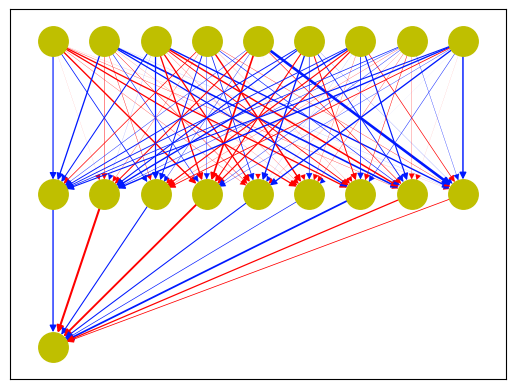

In [163]:
print('Third model with hidden layers (9):')
show_ann(mlp3)

### Reduce hidden layers even more

In [169]:
mlp4_scores = []

for i in range(10):
    mlp4 = MLPClassifier(hidden_layer_sizes=(6), max_iter=1000)
    mlp4.fit(X_train, y_train)
    mlp4_pred = mlp4.predict(X_test)
    mlp4_scores.append(f1_score(y_test, mlp4_pred))

print('HIdden layers of (5) led to a mean f1 score over 10 fittings and predicitons of ', np.array(mlp4_scores).mean())

HIdden layers of (5) led to a mean f1 score over 10 fittings and predicitons of  0.8057065874868758
